In [7]:
import cv2
import facer
import numpy as np
import torch
from tqdm import tqdm
from matplotlib import pyplot as plt
from torchvision.transforms.functional import normalize
from preprocessing.extract_faces import get_video_clip, save_video_lossless

# video_path = "/home/od/Desktop/Dataset/CelebDF/Fake/cropped_faces/id0_id1_0000.avi"
video_path = "/stock/FaceForensicRaw/cropped_faces/F2F/047_862.avi"
fps, frames = get_video_clip(video_path, stride=1)

In [8]:
landmarks = np.load(video_path.replace(
    "cropped_faces", "cropped_faces(landmark)").replace("avi", "npy"))

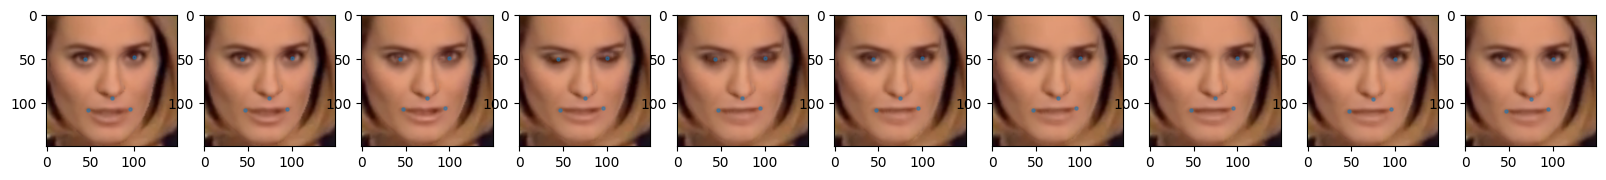

In [9]:
plt.figure(figsize=(20, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(cv2.cvtColor(frames[i], cv2.COLOR_BGR2RGB))
    lm_for_farl = np.stack([
        np.mean(landmarks[i, idxs - 16], axis=0) for idxs in [
            np.array([i for i in range(37, 43)]),
            np.array([i for i in range(43, 49)]),
            np.array([34]),
            np.array([49]),
            np.array([55])
        ]
    ])
    plt.scatter(lm_for_farl[:, 0], lm_for_farl[:, 1], alpha=0.5, s=5)